In [1]:
import numpy as np
from implementations import *
from proj1_helpers import *
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
'''Load the data both from train and test csv file'''

y, x, ids = load_csv_data("train.csv", sub_sample=False)
#_, x_submission, ids_submission = load_csv_data("test.csv", sub_sample=False)
x[x==-999] = 0

In [5]:
'''Define values to perform Ridge regression with simple splitting of the dataset'''

degree = 12
ratio = 0.70  #train/test examples
lambdas = np.logspace(-6,5,10)
seed = 5

w = ridge_with_simple_splitting(y,x, degree, ratio, lambdas, seed)

ValueError: axes don't match array

0

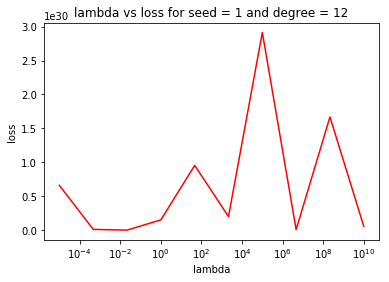

In [6]:
'''Define values to perform Ridge regression with cross validation of the dataset'''

k_fold = 4 #define the number of folds
degree = 12 #define the degree
lambdas = np.logspace(-5,10,10) #define the lambdas
seed = 1 #seed for the random splitting

cross_validation_ridge(y, x, k_fold, degree, lambdas, seed)

In [ ]:
'''Define values to perform logistic regression with cross validation of the dataset'''

y = [0 if t == -1 else t for t in y_train]

k_fold = 4 #define the number of folds
degree = 12 #define the degree
lambdas = np.logspace(-5,1,10) #define the lambdas
seed = 1 #seed for the random splitting

cross_validation_logistic(y, x, k_fold, degree, lambdas, seed)

In [ ]:
create_submission(x_submission, degree, ids_submission)